In [2]:
# General purpose libraries
import numpy as np, os, sys, time
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter

############### CLONE MASCLET_FRAMEWORK FROM https://github.com/dvallesp/masclet_framework #####
sys.path.append('/scratch/valles/masclet_framework/')
import masclet_framework as masclet 
################################################################################################

# vortex_reader libraries
import fortran_reader as fr 
import parameters 
import vortex_reader

In [26]:
# Path to your output files
path = '../src/output_files/'

In [28]:
nmax = 128 # Base grid size
nl = 6 # Number of levels
size = 50.e3 # Size of the domain in input units

it = 144 # Snapshot number to read

parameters.write_parameters(nmax, nmax, nmax, nl, size, path=path) # This will create a file needed by the rest of readers

# Producing slices or projections of a region

### Choose bbox

In [6]:
## Pick the centre of the box, the width of the box, and the number of refinement levels to consider (utl).
cx, cy, cz = 0., 0., 0.
wx, wy, wz = 10e3, 10e3, 10e3
utl = 4

xl, yl, zl = cx-wx/2, cy-wy/2, cz-wz/2
xr, yr, zr = cx+wx/2, cy+wy/2, cz+wz/2

i1 = int((xl+size/2)/size*nmax)
i2 = int((xr+size/2)/size*nmax)
j1 = int((yl+size/2)/size*nmax)
j2 = int((yr+size/2)/size*nmax)
k1 = int((zl+size/2)/size*nmax)
k2 = int((zr+size/2)/size*nmax)

bbox_int = [i1, i2, j1, j2, k1, k2]
print('The box will cover the slice {:}:{:}, {:}:{:}, {:}:{:} of the base grid'.format(*bbox_int))

nuni_x = (i2-i1+1)*2**utl 
nuni_y = (j2-j1+1)*2**utl
nuni_z = (k2-k1+1)*2**utl
print('The uniform grid will have dimensions',nuni_x, nuni_y, nuni_z)

dx_uni = wx/nuni_x

xuni = np.linspace(xl + dx_uni/2, xr - dx_uni/2, nuni_x)
yuni = np.linspace(yl + dx_uni/2, yr - dx_uni/2, nuni_y)
zuni = np.linspace(zl + dx_uni/2, zr - dx_uni/2, nuni_z)

print('The uniform grid will cover the region', xl, xr, yl, yr, zl, zr)
print('The uniform grid will have resolution', dx_uni)

The box will cover the slice 51:76, 51:76, 51:76 of the base grid
The uniform grid will have dimensions 416 416 416
The uniform grid will cover the region -5000.0 5000.0 -5000.0 5000.0 -5000.0 5000.0
The uniform grid will have resolution 24.03846153846154


## Read gridded data and make projections/slices

In [7]:
grids = vortex_reader.read_grids(it, path=path)
npatch, patchnx, patchny, patchnz, patchrx, patchry, patchrz = \
    [grids[k] for k in ['npatch', 'patchnx', 'patchny', 'patchnz', 'patchrx', 'patchry', 'patchrz']]

In [8]:
cr0amr, solap = vortex_reader.read_grid_overlaps(it, path=path)

In [9]:
density = vortex_reader.read_gridded_density(it, path=path)

In [10]:
unigrid = masclet.tools.unigrid(density, bbox_int, utl, npatch, patchnx,
                                patchny, patchnz, patchrx, patchry, patchrz, 
                                size, nmax, interpolate=True)

<AxesSubplot:>

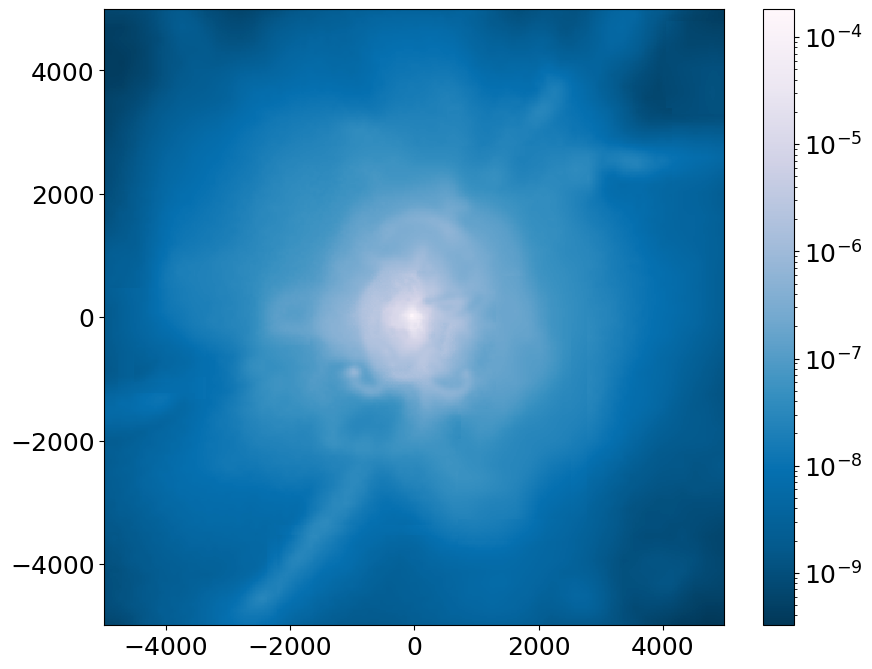

In [11]:
proj = unigrid[:,:, nuni_z//2]
masclet.graphics.colormap2d(proj, x=xuni, y=yuni, are_meshgrid=False, logz=True)

In [12]:
kernel_length = vortex_reader.read_gridded_kernel_length(it, path=path)

In [13]:
unigrid = masclet.tools.unigrid(kernel_length, bbox_int, utl, npatch, patchnx,
                                patchny, patchnz, patchrx, patchry, patchrz, 
                                size, nmax, interpolate=True)

<AxesSubplot:>

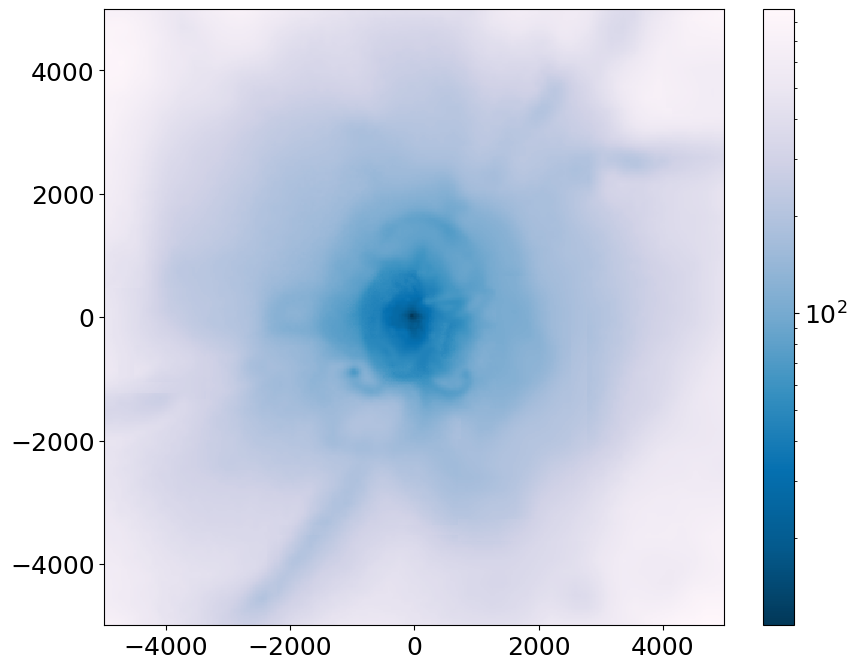

In [14]:
proj = unigrid[:,:, nuni_z//2]
masclet.graphics.colormap2d(proj, x=xuni, y=yuni, are_meshgrid=False, logz=True)

In [15]:
vx, vy, vz = vortex_reader.read_gridded_velocity(it, path=path)

In [16]:
unigrid = masclet.tools.unigrid(vx, bbox_int, utl, npatch, patchnx,
                                patchny, patchnz, patchrx, patchry, patchrz, 
                                size, nmax, interpolate=True)

<AxesSubplot:>

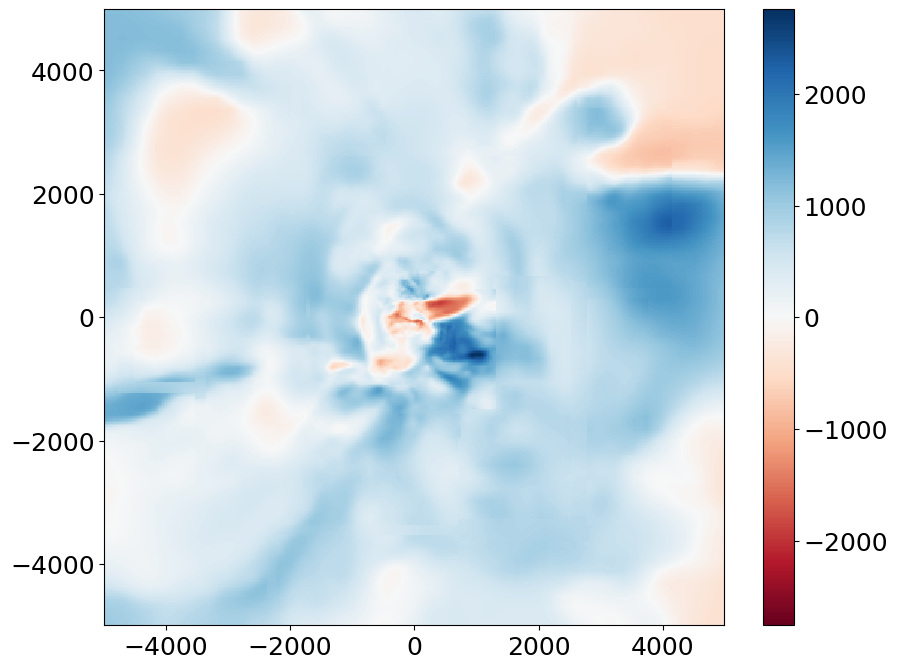

In [17]:
proj = unigrid[:,:, nuni_z//2]
masclet.graphics.colormap2d(proj, x=xuni, y=yuni, are_meshgrid=False, logz=False, cmap='RdBu',
                            cbarmin=-np.max(np.abs(proj)), cbarmax=np.max(np.abs(proj)))

In [18]:
unigrid = masclet.tools.unigrid(vy, bbox_int, utl, npatch, patchnx,
                                patchny, patchnz, patchrx, patchry, patchrz, 
                                size, nmax, interpolate=True)

<AxesSubplot:>

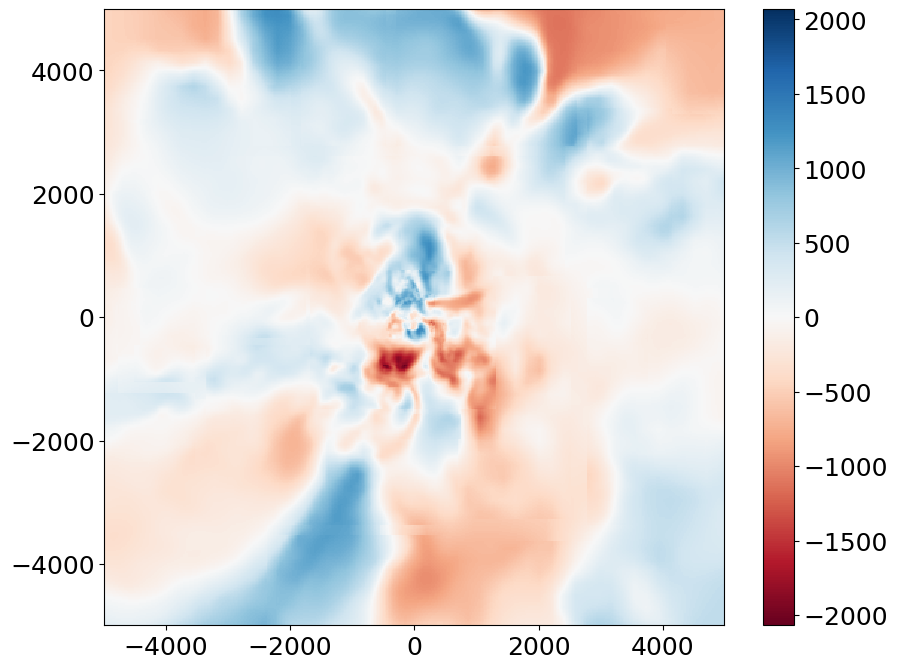

In [19]:
proj = unigrid[:,:, nuni_z//2]
masclet.graphics.colormap2d(proj, x=xuni, y=yuni, are_meshgrid=False, logz=False, cmap='RdBu',
                            cbarmin=-np.max(np.abs(proj)), cbarmax=np.max(np.abs(proj)))

In [20]:
unigrid = masclet.tools.unigrid(vz, bbox_int, utl, npatch, patchnx,
                                patchny, patchnz, patchrx, patchry, patchrz, 
                                size, nmax, interpolate=True)

<AxesSubplot:>

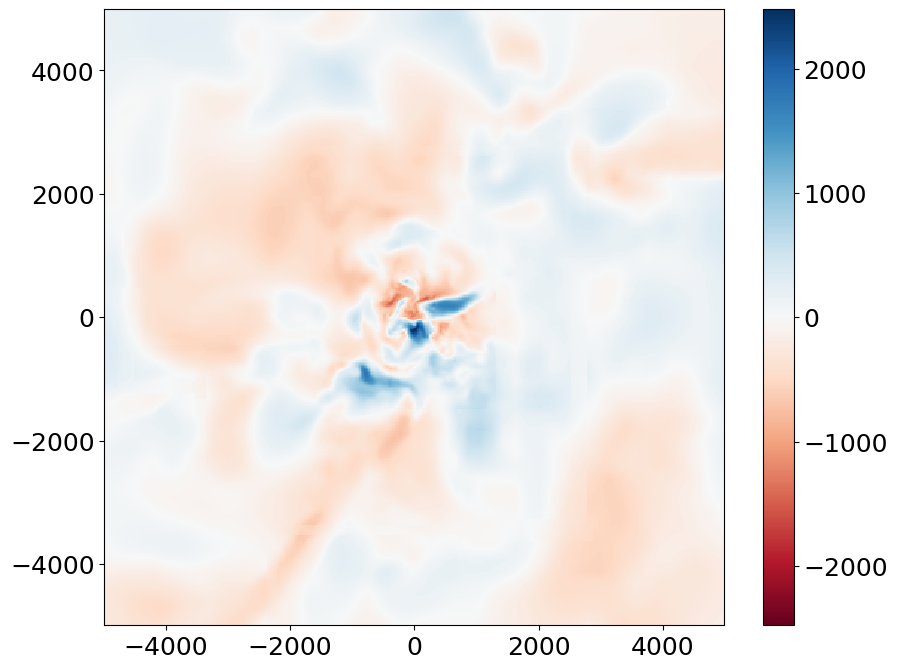

In [21]:
proj = unigrid[:,:, nuni_z//2]
masclet.graphics.colormap2d(proj, x=xuni, y=yuni, are_meshgrid=False, logz=False, cmap='RdBu',
                            cbarmin=-np.max(np.abs(proj)), cbarmax=np.max(np.abs(proj)))

In [22]:
mach = vortex_reader.read_gridded_mach(it, path=path)

In [23]:
unigrid = masclet.tools.unigrid(mach, bbox_int, utl, npatch, patchnx,
                                patchny, patchnz, patchrx, patchry, patchrz, 
                                size, nmax, interpolate=True)

<AxesSubplot:>

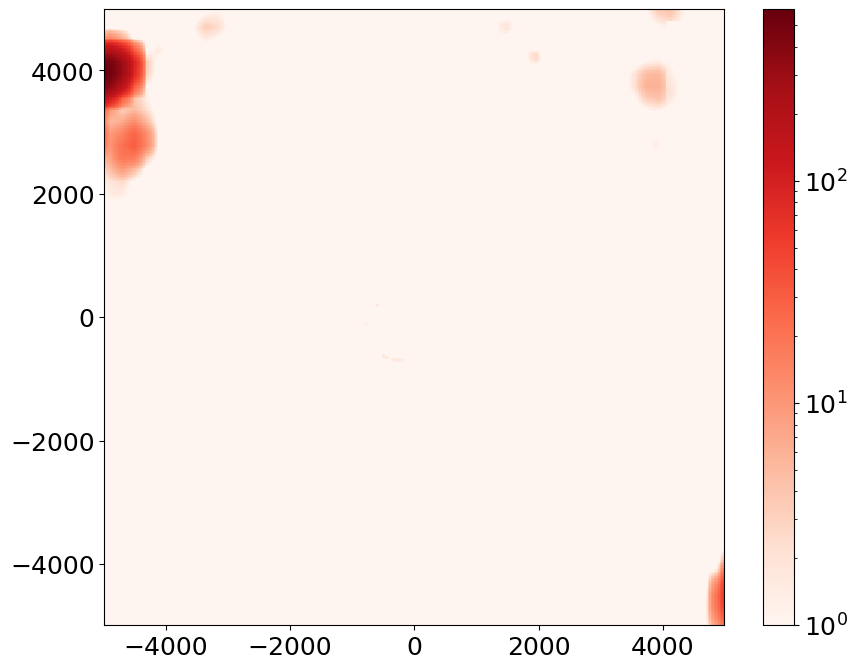

In [24]:
proj = unigrid[:,:, nuni_z//2 + 16 : nuni_z//2 + 16 + 1].max(axis=2)
proj[proj<1]=1
masclet.graphics.colormap2d(proj, x=xuni, y=yuni, are_meshgrid=False, logz=True, cmap='Reds')

## Read gridded results

In [29]:
divv = vortex_reader.read_divv(it, path=path)

In [30]:
unigrid = masclet.tools.unigrid(divv, 
                                bbox_int, utl, npatch, patchnx,
                                patchny, patchnz, patchrx, patchry, patchrz, 
                                size, nmax, interpolate=True)

<AxesSubplot:>

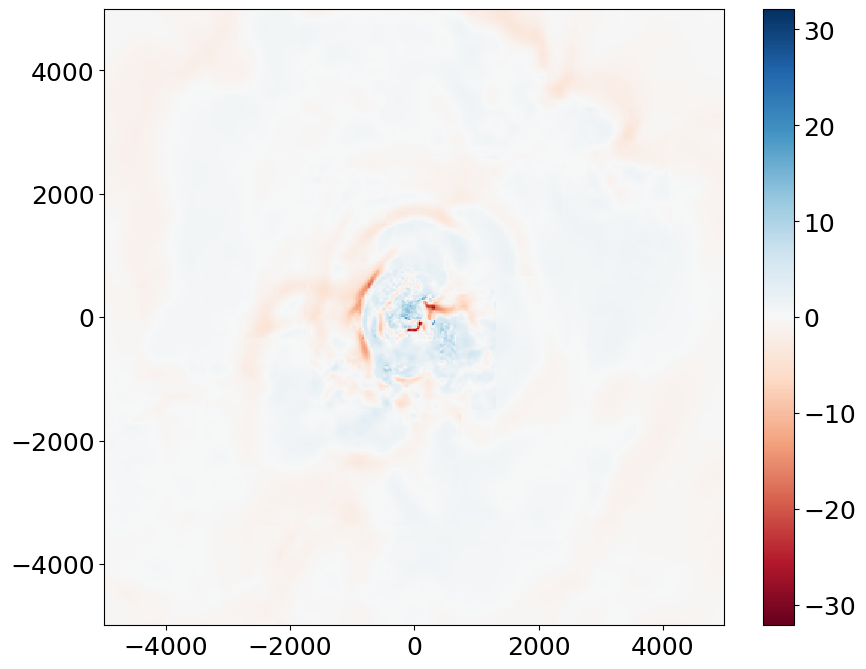

In [31]:
proj = unigrid[:,:, nuni_z//2]
masclet.graphics.colormap2d(proj, x=xuni, y=yuni, are_meshgrid=False, logz=False, cmap='RdBu',
                            cbarmin=-np.max(np.abs(proj)), cbarmax=np.max(np.abs(proj)))

In [32]:
curlvx, curlvy, curlvz = vortex_reader.read_curlv(it, path=path)

In [33]:
unigrid = masclet.tools.unigrid([0.5*(xx**2 + yy**2 + zz**2) for xx,yy,zz in zip(curlvx, curlvy, curlvz)], 
                                bbox_int, utl, npatch, patchnx,
                                patchny, patchnz, patchrx, patchry, patchrz, 
                                size, nmax, interpolate=True)

<AxesSubplot:>

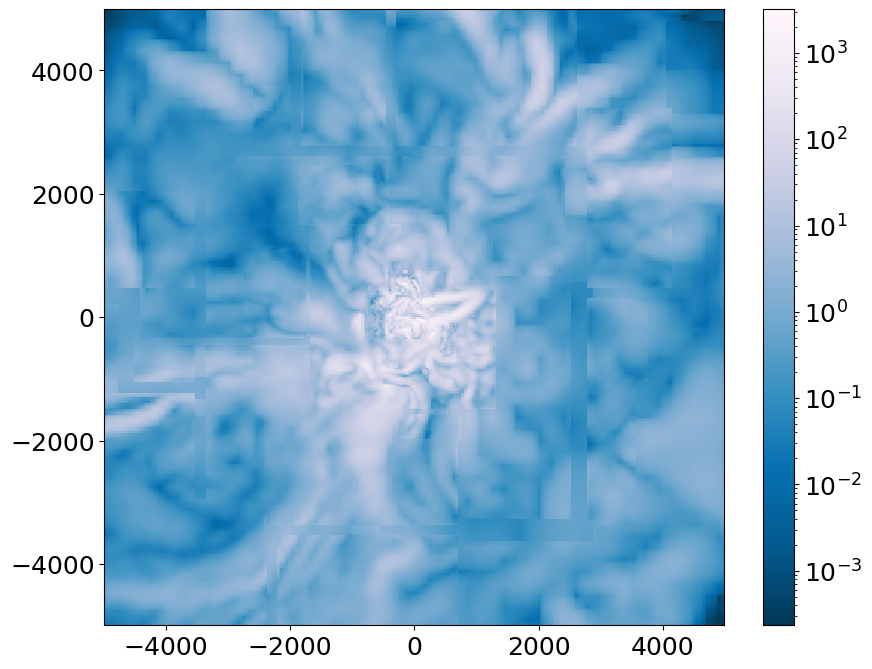

In [34]:
proj = unigrid[:,:, nuni_z//2]
masclet.graphics.colormap2d(gaussian_filter(proj, sigma=.3), x=xuni, y=yuni, are_meshgrid=False, logz=True)

In [35]:
spot = vortex_reader.read_spot(it, path=path)

In [36]:
unigrid = masclet.tools.unigrid(spot, bbox_int, utl, npatch, patchnx,
                                patchny, patchnz, patchrx, patchry, patchrz, 
                                size, nmax, interpolate=True)

<AxesSubplot:>

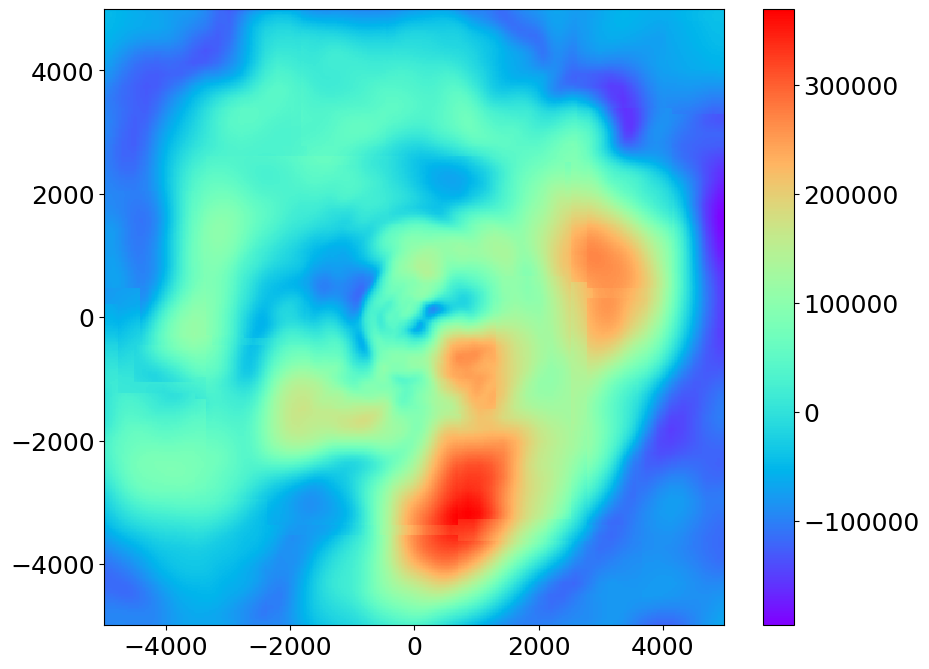

In [37]:
proj = unigrid[:,:, nuni_z//2]
proj = proj 
masclet.graphics.colormap2d(proj, x=xuni, y=yuni, are_meshgrid=False, logz=False, cmap='rainbow')

In [38]:
vpotx, vpoty, vpotz = vortex_reader.read_vpot(it, path=path)

In [39]:
unigrid = masclet.tools.unigrid([np.sqrt(xx**2 + yy**2 + zz**2) for xx,yy,zz in zip(vpotx, vpoty, vpotz)], 
                                bbox_int, utl, npatch, patchnx,
                                patchny, patchnz, patchrx, patchry, patchrz, 
                                size, nmax, interpolate=True)

<AxesSubplot:>

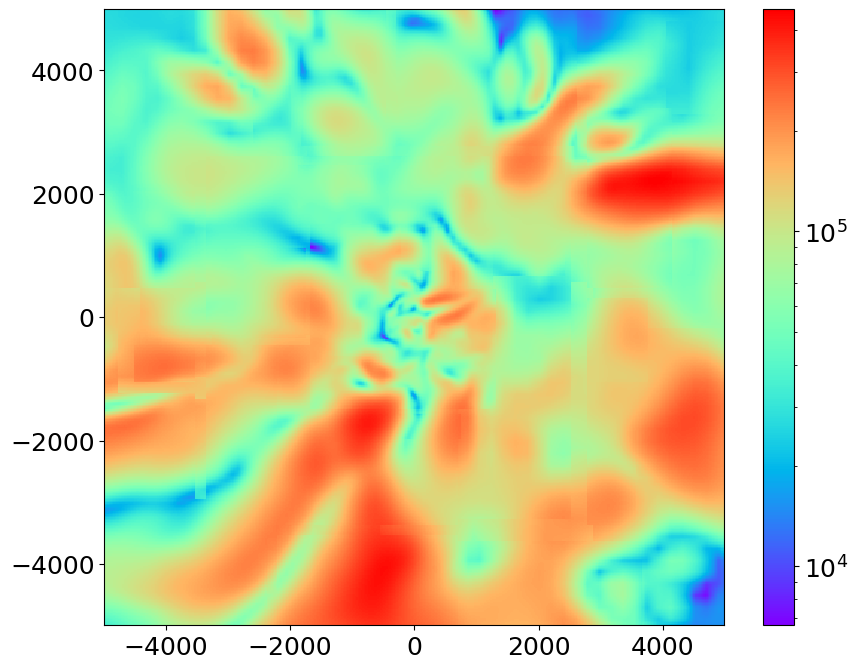

In [40]:
proj = unigrid[:,:, nuni_z//2]
masclet.graphics.colormap2d(proj, x=xuni, y=yuni, are_meshgrid=False, logz=True, cmap='rainbow')

In [59]:
vcompx, vcompy, vcompz = vortex_reader.read_vcomp(it, path=path)

In [60]:
unigrid = masclet.tools.unigrid([np.sqrt(xx**2 + yy**2 + zz**2) for xx,yy,zz in zip(vcompx, vcompy, vcompz)], 
                                bbox_int, utl, npatch, patchnx,
                                patchny, patchnz, patchrx, patchry, patchrz, 
                                size, nmax, interpolate=True)

<AxesSubplot:>

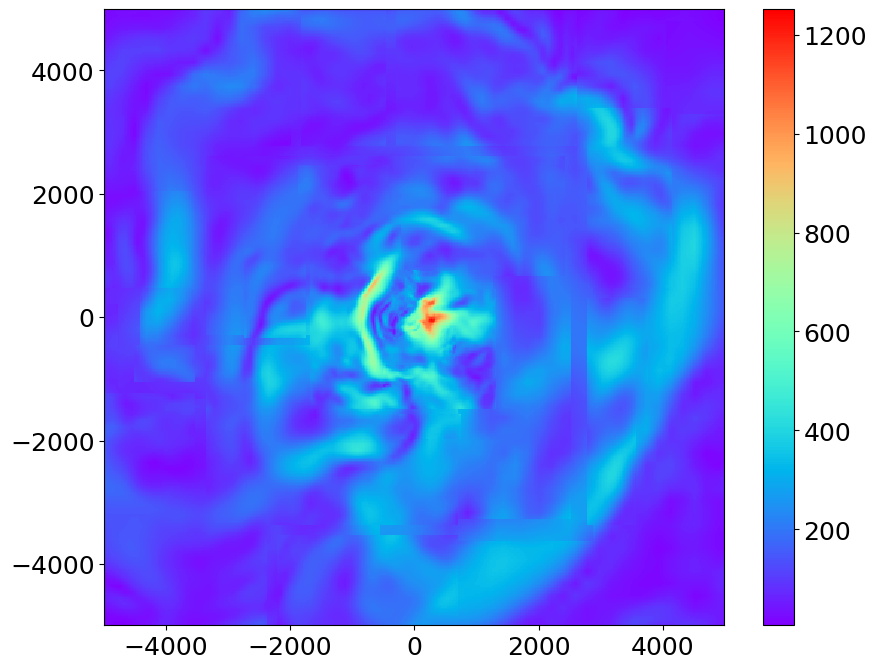

In [62]:
proj = unigrid[:,:, nuni_z//2]
masclet.graphics.colormap2d(gaussian_filter(proj, sigma=0.3), x=xuni, y=yuni, are_meshgrid=False, logz=False, cmap='rainbow')

In [53]:
vsolx, vsoly, vsolz = vortex_reader.read_vsol(it, path=path, filename='vsol')

In [54]:
unigrid = masclet.tools.unigrid([np.sqrt(xx**2 + yy**2 + zz**2) for xx,yy,zz in zip(vsolx, vsoly, vsolz)], 
                                bbox_int, utl, npatch, patchnx,
                                patchny, patchnz, patchrx, patchry, patchrz, 
                                size, nmax, interpolate=True)

<AxesSubplot:>

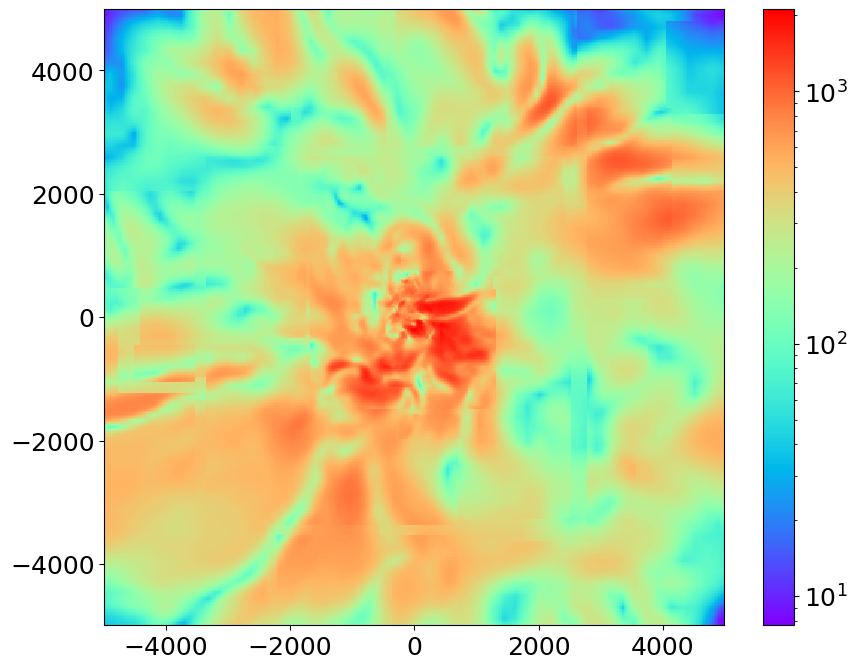

In [57]:
proj = unigrid[:,:, nuni_z//2]
masclet.graphics.colormap2d(proj, x=xuni, y=yuni, are_meshgrid=False, logz=True, cmap='rainbow')

### Read filter data

In [63]:
filtlen = vortex_reader.read_gridded_filtlen(it, path=path)

In [64]:
unigrid = masclet.tools.unigrid(filtlen, bbox_int, utl, npatch, patchnx,
                                patchny, patchnz, patchrx, patchry, patchrz, 
                                size, nmax, interpolate=True)

<AxesSubplot:>

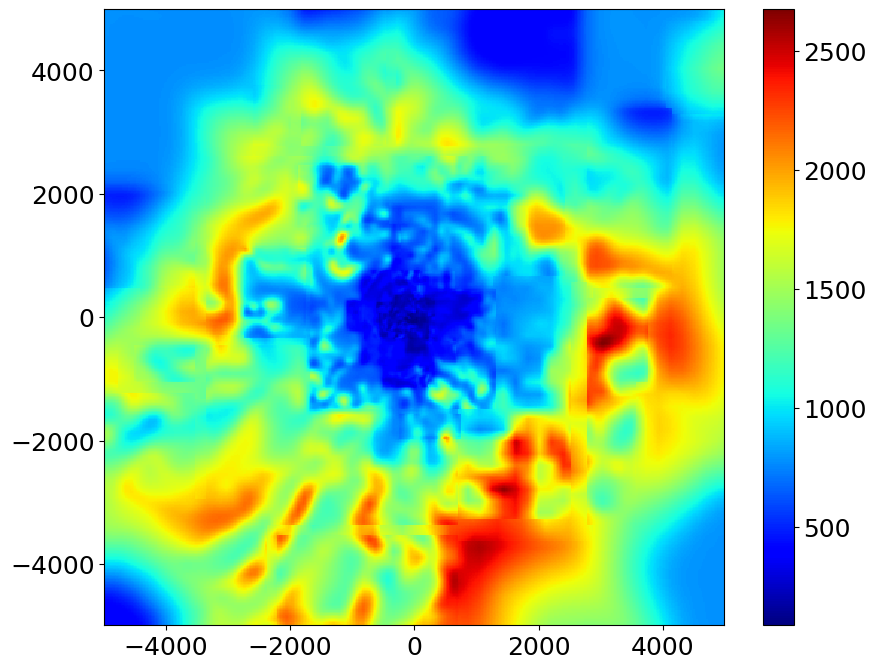

In [65]:
proj = unigrid[:,:, nuni_z//2]
masclet.graphics.colormap2d(proj, x=xuni, y=yuni, are_meshgrid=False, logz=False, cmap='jet')

In [66]:
vturbx, vturby, vturbz = vortex_reader.read_gridded_vturb(it, path=path)

In [67]:
unigrid = masclet.tools.unigrid([np.sqrt(xx**2 + yy**2 + zz**2) for xx,yy,zz in zip(vturbx, vturby, vturbz)], 
                                bbox_int, utl, npatch, patchnx,
                                patchny, patchnz, patchrx, patchry, patchrz, 
                                size, nmax, interpolate=True)

<AxesSubplot:>

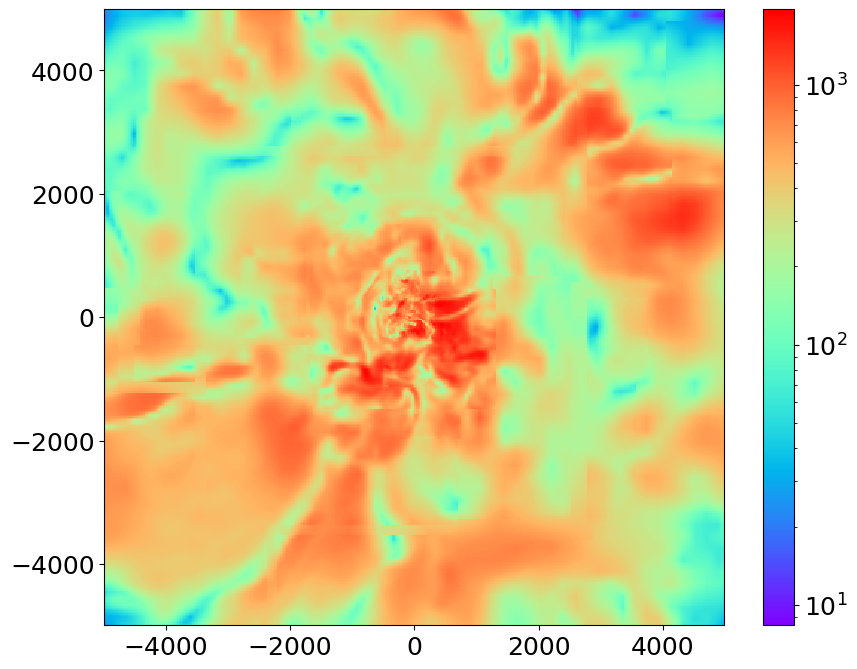

In [70]:
proj = unigrid[:,:, nuni_z//2]
#proj = proj - proj.min() + np.std(proj)
masclet.graphics.colormap2d(proj, x=xuni, y=yuni, are_meshgrid=False, logz=True, cmap='rainbow')

In [71]:
shocked = vortex_reader.read_shocked(it, path=path)

In [72]:
unigrid = masclet.tools.unigrid(shocked, 
                                bbox_int, utl, npatch, patchnx,
                                patchny, patchnz, patchrx, patchry, patchrz, 
                                size, nmax, interpolate=True)

<AxesSubplot:>

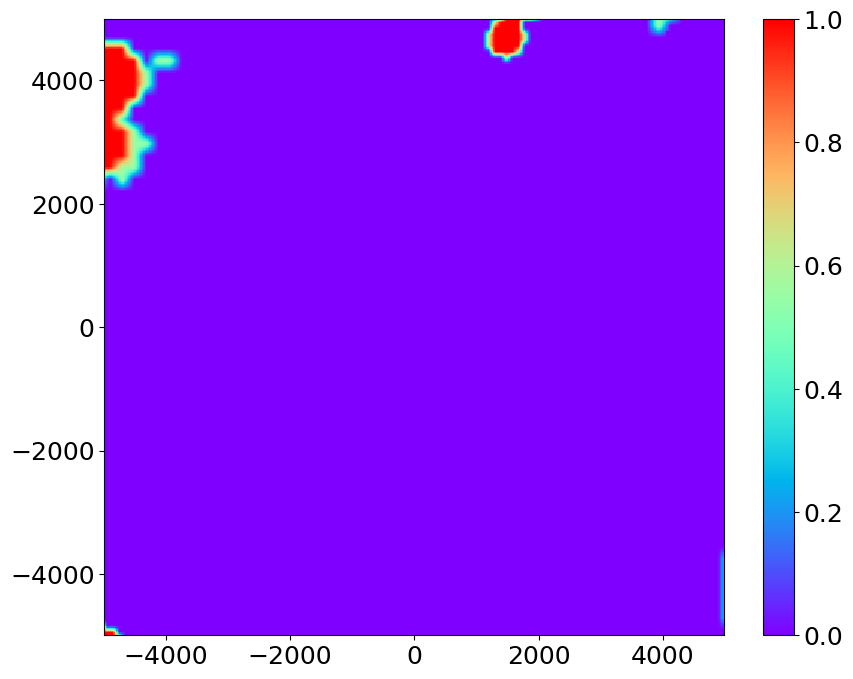

In [73]:
proj = unigrid[:,:, nuni_z//2]
masclet.graphics.colormap2d(proj, x=xuni, y=yuni, are_meshgrid=False, logz=False, cmap='rainbow')

### Read particle data

In [74]:
errpart = vortex_reader.read_errorparticles(it, path=path)

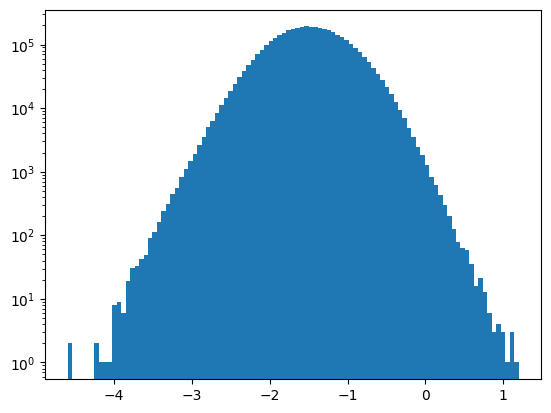

In [75]:
plt.hist(np.log10(errpart), bins=101, log=True);

In [76]:
results_particles = vortex_reader.read_velocityparticles(it, path=path, return_original_velocity=True)

In [77]:
results_particles.keys()

dict_keys(['orig_vxpart', 'orig_vypart', 'orig_vzpart', 'smooth_vxpart', 'smooth_vypart', 'smooth_vzpart', 'smooth_vxcomppart', 'smooth_vycomppart', 'smooth_vzcomppart', 'smooth_vxsolpart', 'smooth_vysolpart', 'smooth_vzsolpart'])

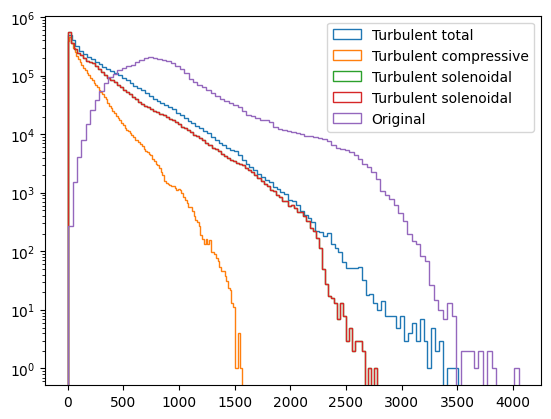

In [78]:
plt.hist(np.sqrt(results_particles['smooth_vxpart']**2 + results_particles['smooth_vypart']**2 + results_particles['smooth_vzpart']**2), bins=101, log=True, histtype='step', 
        label='Turbulent total')
plt.hist(np.sqrt(results_particles['smooth_vxcomppart']**2 + results_particles['smooth_vycomppart']**2 + results_particles['smooth_vzcomppart']**2), bins=101, log=True, histtype='step', 
        label='Turbulent compressive')
plt.hist(np.sqrt(results_particles['smooth_vxsolpart']**2 + results_particles['smooth_vysolpart']**2 + results_particles['smooth_vzsolpart']**2), bins=101, log=True, histtype='step', 
        label='Turbulent solenoidal')
plt.hist(np.sqrt(results_particles['smooth_vxsolpart']**2 + results_particles['smooth_vysolpart']**2 + results_particles['smooth_vzsolpart']**2), bins=101, log=True, histtype='step', 
        label='Turbulent solenoidal')
plt.hist(np.sqrt(results_particles['orig_vxpart']**2 + results_particles['orig_vypart']**2 + results_particles['orig_vzpart']**2), bins=101, log=True, histtype='step', 
        label='Original')

plt.legend()